### Question 1:

Suppose you're on a game show, and you're given the choice of three doors: Behind one
door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who
knows what's behind the doors, opens another door, say No. 3, which has a goat. He then
says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your
choice? (Note: Please show your solution step-by-step by using what you know about
marginal probability, conditional probability, joint probability, and the Bayes’ theorem)

Let,

A: event that the car is behind door no. 1

B: event that the car is behind door no. 2

C: event that the car is behind door no. 3

The probability of the car being behind the door the contestant picks inititally (door no. 1) is 1/3.

P(A) = 1/3

This means that the car being behind the doors not chosen by the contestant (door no. 2 or door no. 3) is 2/3. 

P(B ∪ C) = 2/3

Once the host opens one of the doors not chosen by the contestant (door no. 3) the probability of the car being behind the door of 2/3 shifts entirely to the door not chosen by the contestant and not opened by the host (door no. 2).

P(B|C') = 2/3

So, now the probability of the car being behind the door initially chosen by the contestant (door no. 1) is 1/3. The probability of the car not chosen by the contestant and not opened by the host is 2/3.

P(A|C') = 1/3

Hence, it would be to the contestant's adavantage to switch. 

### Question 2:

Suppose we have two NBA teams – for simplicity team A and team B – who have made
it to NBA Playoffs. In each game between these two teams, team A has a winning
probability of 0.55, and team B has a winning probability of 0.45. What is the probability
that these two teams will play the $ 7^{th} $ game in NBA Playoffs? 

Notes: 

i. There cannot be a tie in any game.

ii. Please check this link for more information about NBA Playoffs:
https://en.wikipedia.org/wiki/NBA_playoffs and to think about possible combinations.

iii. Also, please show your solution step-by-step by using what you know about marginal
probability, conditional probability, joint probability, and the Bayes’ theorem.

The playoffs use a best-of-seven elimination format. This means two teams play each other up to seven times, with the team that wins four games progressing to the next round.

That is, the team which is first to win 4 rounds against the other team progresses to the next round.

Now, in order for 2 teams to play the 7th round against one another, they must win 3 games each in the first 6 games.

Let P(A) be probability of team A winning a game against team B and P(B) be probability of team B winning A game against team A.

P(A) = 0.55

P(B) = 0.45

If we think in terms of a binomial probability distribution, we can consider that for 6 trials, the probabiliity of success is probability of team A winning 3 times. This also means that team A also loses 3 times or team B wins 3 times. 

Probability that team A and B play the 7th game in the NBA playoffs = $ _{6}C_{3} . P(A)^{3} . P(B)^{6-3} $ = $ \frac{6!}{3!(6-3)!} . (0.55)^{3}.(0.45)^{3}$ = $ 20 $ x $ 0.166375 $ x $ 0.091125 $ = $ 0.3032184375 $


### Question 3:

From scratch (not using any pre-packaged tools for direct calculation), implement the
gradient descent algorithm for linear regression and test your results on the California
Housing Dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

Here is what you need to do step by step:

a. Implement the gradient descent algorithm from scratch

b. Choose the following features from the dataset as your X matrix: MedInc,
HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

c. Choose the following feature from the dataset as your Y matrix: MedHouseVal

d. Randomly split your data into training (70% of total) and test sets (30% of total)
by using sklearn’s train_test_split function. Set random_state =
265: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

e. Set the number_of_steps = 1000 and learning_rate = 0.01.

f. By running your code, determine the best set of parameters (=weights) for the
constant and your features listed in b). Your cost function will be $ R^2 $
(=you should pick the set of parameters that give you the highest R^2).

g. Report and interpret the results. What are the factors that explain the house
prices the most?

In [44]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [45]:
from sklearn.datasets import fetch_california_housing
df_calhousing = fetch_california_housing(as_frame=True)

In [46]:
df_calhousing = df_calhousing.frame
df_calhousing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [47]:
X = df_calhousing.drop(['MedHouseVal'], axis=1)
y = df_calhousing['MedHouseVal']


In [48]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 265)

In [50]:
X_train

array([[-3.98873933e-01,  1.06160074e+00, -2.81480844e-01, ...,
        -4.87791326e-02,  1.25855037e+00, -1.45261790e+00],
       [ 2.13882617e-01, -1.40159970e+00,  2.53190494e-01, ...,
         1.98784220e-02,  6.12452908e-01, -1.64860651e-01],
       [-1.11627442e+00,  1.45889113e+00, -5.77580582e-01, ...,
        -1.05992513e-02,  9.96365895e-01, -1.31286130e+00],
       ...,
       [ 4.33224301e-01, -2.09728520e-01,  2.22349914e-02, ...,
        -1.34502067e-03, -7.03151353e-01,  8.63348626e-01],
       [ 1.43444776e+00, -9.24851228e-01,  6.17607758e-01, ...,
         2.77994856e-02, -7.54651875e-01,  9.23244312e-01],
       [ 1.42032029e-01, -1.87834817e+00,  2.13286690e-01, ...,
        -2.98456989e-02, -1.12451927e+00,  1.14785313e+00]])

#### Cost function

The cost function to be used is Mean Squared Error, which can be written as follows:

$ J(\theta) = \frac{1}{m}\sum_{i=1}^m{(h_{(\theta)}(x^{(i)}) - y^{(i)})}^2 $

In [51]:
def CostFunction(X,y,w,b):
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

#### Hypothesis function

For multivariate linear regression, the hypothesis function is as follows:

$ h(x) = \theta_0 + (\theta_1 * x_1) + (\theta_2 * x_2) + ... + \theta_n * x_n $

where $ x_1, x_2, ..., x_n $ are the input values.


In [52]:
def GradientDescent(X, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = X.dot(w) + b
        loss = z - y
        
        weight_gradient = X.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate * weight_gradient
        b = b - learning_rate * bias_gradient
  
        cost = CostFunction(X, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

#### Calculating weights and bias

In [53]:
w, b, c = GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.01, epochs=1000)

Cost is: 2.7535149392500613
Cost is: 0.6431196305450871
Cost is: 0.35374926936508805
Cost is: 0.30850398965754944
Cost is: 0.29718926538839896
Cost is: 0.2912562446368607
Cost is: 0.2866882433712475
Cost is: 0.2828354526919
Cost is: 0.27953029323936296
Cost is: 0.2766855055921477


#### Plotting the cost

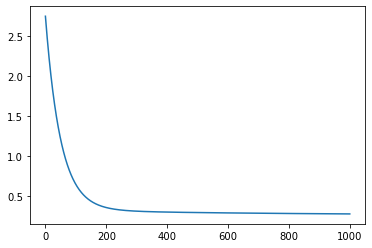

In [54]:
plt.plot(c)
plt.show()

#### Predicting labels with the calculated weights and biases

In [55]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(X_test, w, b)
y_pred

array([2.19764111, 3.25465178, 1.2309983 , ..., 2.00309892, 3.17263369,
       1.60138045])

#### Calculating the  accuracy of our model

In [56]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, y_test)

0.5718831993093252

Reference: https://faun.pub/implementing-multiple-linear-regression-from-scratch-in-python-f5d84d4935bb

### Question 4:

Now, try using a pre-packaged tool and comparing the results. Do the following:

a. Use SGDRegressor provided by scikit:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

b. Step b), c), and d) are the same as in Question 3.

c. Set the max_iter = 1000, alpha = 0.01, random_state=265, loss=“squared_error”. Other parameters should be
set to ‘default’.

d. By running your code, determine the best set of parameters (=weights) for the
constant and your features listed in b). Your cost function will be $ R^2 $.

e. Report and interpret the results. What are the factors that explain the house
prices the most? Are the results different from the previous question? If
different, explain why the results might be different.

In [57]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

#### Importing, scaling and splitting the data

In [59]:
df_calhousing = fetch_california_housing(as_frame=True)
df_calhousing = df_calhousing.frame
df_calhousing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [60]:
X = df_calhousing.drop(['MedHouseVal'], axis=1)
y = df_calhousing['MedHouseVal']


In [61]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 265)

#### Building the Stochastic Gradient Descent Regressor model

In [63]:
sgdr = SGDRegressor(max_iter = 1000, alpha = 0.01, random_state=265, loss='squared_loss')
print(sgdr)

SGDRegressor(alpha=0.01, random_state=265)


#### Training the model

In [64]:
sgdr.fit(X_train, y_train)
score = sgdr.score(X_train, y_train)
print("R-squared:", score)


R-squared: -28756009.791211665


#### Predicting using trained model

In [65]:
y_pred = sgdr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  2532691.140612987


Reference: https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html

#### Major factors influencing house prices

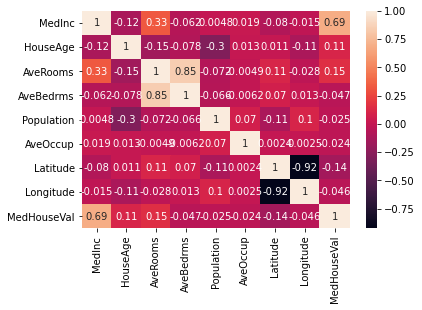

In [66]:
ax = sns.heatmap(df_calhousing.corr(), annot=True)

In [67]:
print (sgdr.coef_)

[  126.90556887   -40.31562951  -328.46291691   241.04693854
   -30.93057452 -5259.95942711   127.45391147   177.54366362]


The attributes influeincing house prices in California the most are, MedInc, HouseAge, Latitude and AveRooms.

### Question 5:

Finally, write a function from scratch that computes a variance-covariance matrix by
transforming the following formula into code: 

Variance-covariance matrix: $ cov(X) =  E[(X − E[X])(X − E[X])^T] $

Your function/code should work for matrices of any size. Test that your function is running
(=successfully computing the variances and covariances of the variables and variable pairs
in the dataset) by using the California Housing Dataset that you have used in previous
questions.

In [68]:
def cov_calculator(df):
    X = np.asmatrix(df)
    E_X = df.mean()
    X_minus_E_X = pd.DataFrame()
    for i in range(0, len(df.columns)):
        X_minus_E_X[i] = (df.iloc[:,i] - df.mean()[i])  
    X_minus_E_X = np.asmatrix(X_minus_E_X)
    X_minus_E_X_trans = np.transpose(X_minus_E_X)
    print(np.dot(X_minus_E_X_trans,X_minus_E_X)/(len(df)-1))

In [75]:
cov_calculator(df_calhousing)

[[ 3.60932256e+00 -2.84614028e+00  1.53656801e+00 -5.58575949e-02
   1.04009792e+01  3.70288896e-01 -3.23859753e-01 -5.77647021e-02
   1.50847483e+00]
 [-2.84614028e+00  1.58396260e+02 -4.77288245e+00 -4.63718412e-01
  -4.22227058e+03  1.72429796e+00  3.00345508e-01 -2.72824366e+00
   1.53398801e+00]
 [ 1.53656801e+00 -4.77288245e+00  6.12153272e+00  9.93867801e-01
  -2.02333712e+02 -1.24688866e-01  5.62235473e-01 -1.36518371e-01
   4.33825637e-01]
 [-5.58575949e-02 -4.63718412e-01  9.93867801e-01  2.24591500e-01
  -3.55272253e+01 -3.04242537e-02  7.05752856e-02  1.26704371e-02
  -2.55392194e-02]
 [ 1.04009792e+01 -4.22227058e+03 -2.02333712e+02 -3.55272253e+01
   1.28247046e+06  8.21712002e+02 -2.63137814e+02  2.26377839e+02
  -3.22124873e+01]
 [ 3.70288896e-01  1.72429796e+00 -1.24688866e-01 -3.04242537e-02
   8.21712002e+02  1.07870026e+02  5.24916416e-02  5.15187178e-02
  -2.84493983e-01]
 [-3.23859753e-01  3.00345508e-01  5.62235473e-01  7.05752856e-02
  -2.63137814e+02  5.2491641

In [70]:
df_calhousing.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765,1.508475
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244,1.533988
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518,0.433826
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670,-0.025539
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839,-32.212487
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519,-0.284494
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054,-0.355326
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139,-0.106274
MedHouseVal,1.508475,1.533988,0.433826,-0.025539,-3.221249e+01,-0.284494,-0.355326,-0.106274,1.331615
